## I decided to treat this as a classification problem by creating a new binary variable affair (did the woman have at least one affair?) and trying to predict the classification for each woman. 
 
Dataset 
 
The dataset I chose is the affairs dataset that comes with Statsmodels. It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs. More information about the study is available in a 1978 paper from the Journal of Political Economy. 

### Description of Variables 
 
#### The dataset contains 6366 observations of 9 variables: 
 
#### rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good) 
 
#### age: woman's age 
 
#### yrs_married: number of years married 
 
#### children: number of children 
 
#### religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious) 
 
#### educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree) 
#### occupation: woman's occupation (1 = student, 2 = farming/semiskilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree) 
 
#### occupation_husb: husband's occupation (same coding as above) 
 
#### affairs: time spent in extra-marital affairs 

## Lib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import statsmodels.api as sm 

## Load the data

In [2]:
data = sm.datasets.fair.load_pandas().data 

In [3]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [4]:
data.shape

(6366, 9)

In [5]:
data.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs'],
      dtype='object')

In [6]:
## variable identification

In [7]:
data.dtypes

rate_marriage      float64
age                float64
yrs_married        float64
children           float64
religious          float64
educ               float64
occupation         float64
occupation_husb    float64
affairs            float64
dtype: object

In [8]:
x = data.iloc[:,:-1]


In [10]:
y = data['affairs']

## univariate analysis

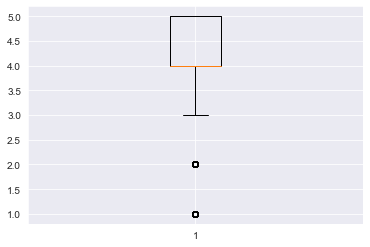

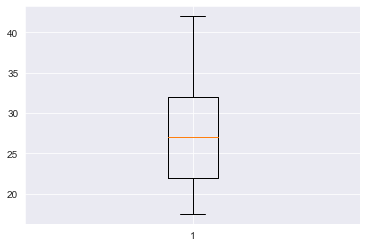

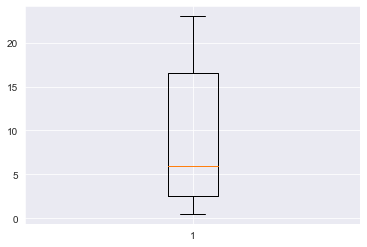

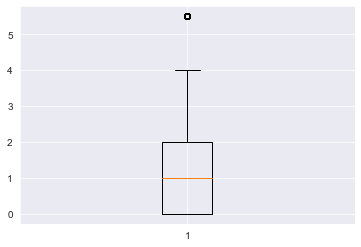

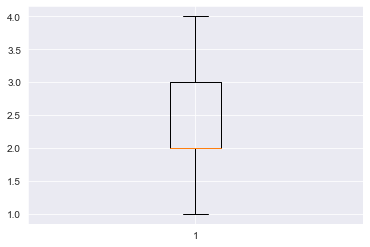

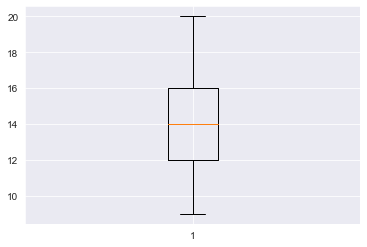

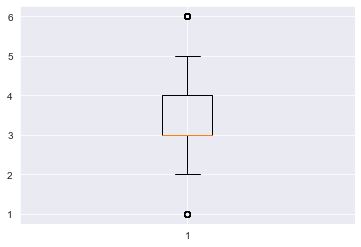

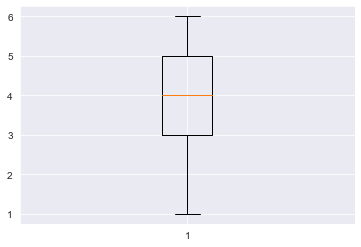

In [11]:
for col in x:
    plt.boxplot(x[col])
    plt.show()

In [12]:
## Bivariate analysis

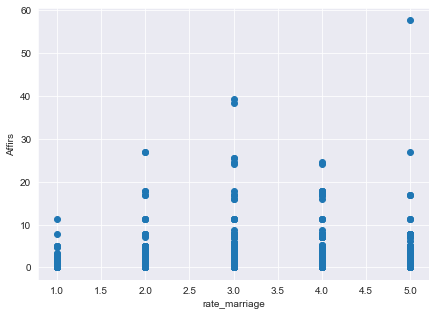

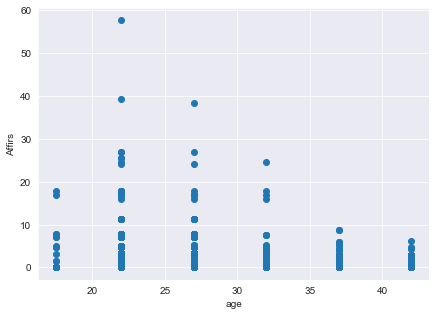

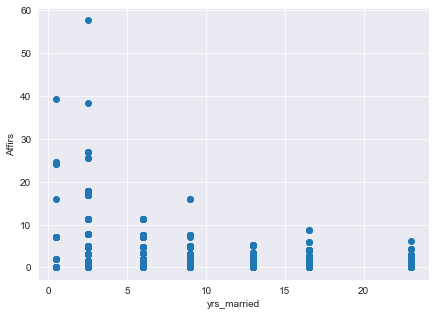

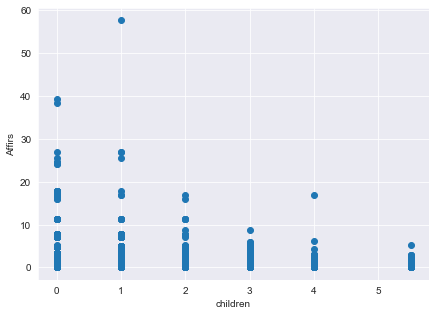

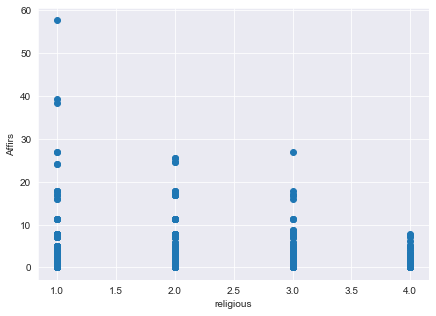

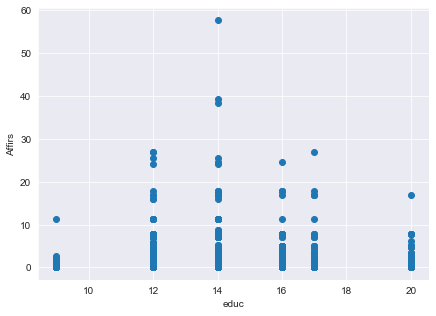

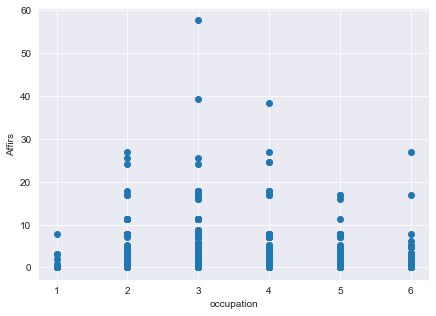

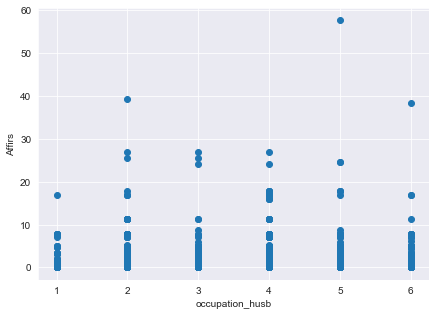

In [13]:

for i in x:
    plt.figure(figsize=(7,5))
    plt.scatter(x[i],y)
    plt.xlabel(i)
    plt.ylabel('Affirs')
    plt.show()

## Multivariate analysis

In [14]:
data.corr()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
rate_marriage,1.000000,-0.111127,-0.128978,-0.129161,0.078794,0.079869,0.039528,0.027745,-0.178068
age,-0.111127,1.000000,0.894082,0.673902,0.136598,0.027960,0.106127,0.162567,-0.089964
yrs_married,-0.128978,0.894082,1.000000,0.772806,0.132683,-0.109058,0.041782,0.128135,-0.087737
children,-0.129161,0.673902,0.772806,1.000000,0.141845,-0.141918,-0.015068,0.086660,-0.070278
religious,0.078794,0.136598,0.132683,0.141845,1.000000,0.032245,0.035746,0.004061,-0.125933
educ,0.079869,0.027960,-0.109058,-0.141918,0.032245,1.000000,0.382286,0.183932,-0.017740
occupation,0.039528,0.106127,0.041782,-0.015068,0.035746,0.382286,1.000000,0.201156,0.004469
occupation_husb,0.027745,0.162567,0.128135,0.086660,0.004061,0.183932,0.201156,1.000000,-0.015614
affairs,-0.178068,-0.089964,-0.087737,-0.070278,-0.125933,-0.017740,0.004469,-0.015614,1.000000


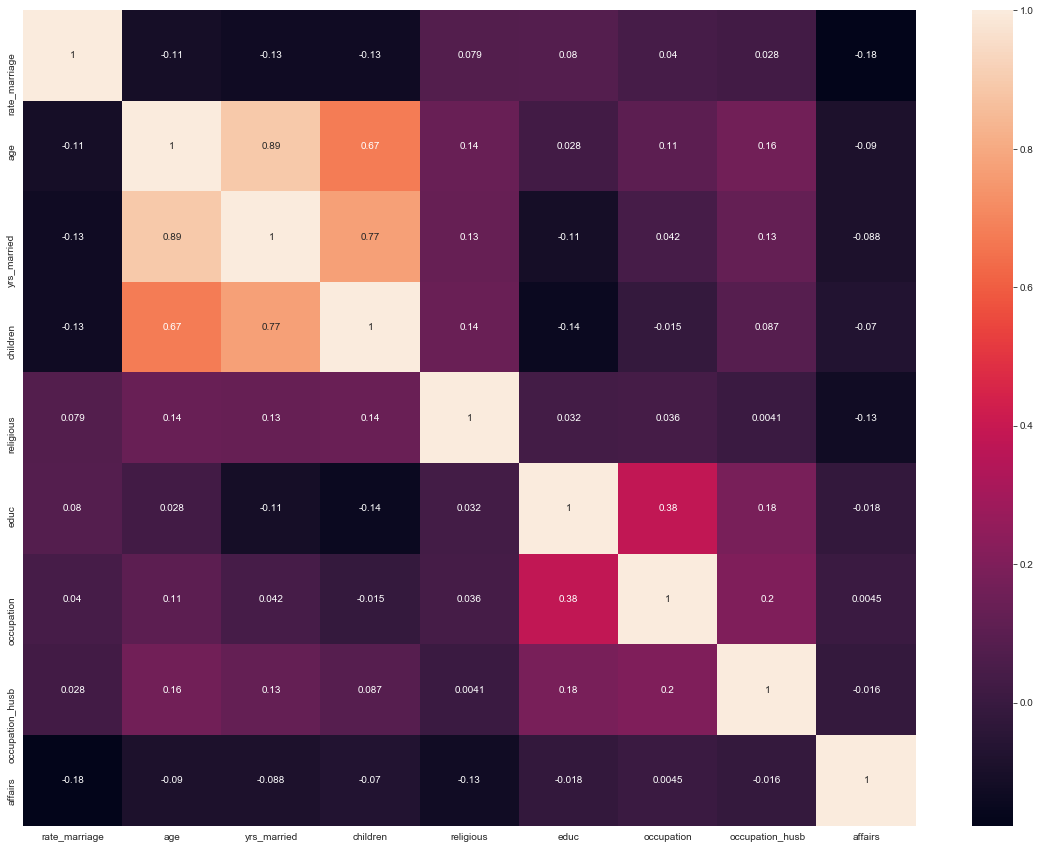

In [15]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)

In [16]:
data.shape

(6366, 9)

In [17]:
data['affairs'].value_counts()

0.000000     4313
1.400000      118
0.583333       86
0.400000       72
1.333333       72
             ... 
0.622222        1
39.199982       1
7.111111        1
4.923077        1
0.339394        1
Name: affairs, Length: 77, dtype: int64

In [18]:
data['affairs'].describe()

count    6366.000000
mean        0.705374
std         2.203374
min         0.000000
25%         0.000000
50%         0.000000
75%         0.484848
max        57.599991
Name: affairs, dtype: float64

# add "affair" column: 1 represents having affairs, 0 
represents not dta['affair'] = (dta.affairs > 
0).astype(int)

In [45]:
y=data['affairs']
def aa(y):
    if y>0:
        return 1# affair
    else:
        return 0 # no affair
    
y=y.apply(aa)
y.value_counts()
y = y.astype('int')

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
ss = StandardScaler()

In [22]:
ss_x= ss.fit_transform(x)


In [23]:
x1 = pd.DataFrame(x,columns=x.columns)

In [26]:
x = x1

### y = np.ravel(y)

In [27]:
y = np.ravel(y) 

In [28]:
x.shape,y.shape

((6366, 8), (6366,))

## Split of data

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,t_y,test_size = 0.3,random_state = 101)

In [30]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((4456, 8), (1910, 8), (4456,), (1910,))

## Model Building

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lr  = LogisticRegression()

In [33]:
model = lr.fit(X_train,Y_train)

In [34]:
train_predict = model.predict(X_train)

In [35]:
test_predict = model.predict(X_test)

In [36]:
from sklearn.metrics import classification_report,f1_score,accuracy_score

In [37]:
print('Train:',accuracy_score(Y_train,train_predict))
print('Test:',accuracy_score(Y_test,test_predict))

Train: 0.7275583482944344
Test: 0.7136125654450262


In [38]:
print('Train:',classification_report(Y_train,train_predict))
print('Test:',classification_report(Y_test,test_predict))

Train:               precision    recall  f1-score   support

           0       0.75      0.90      0.82      3036
           1       0.63      0.36      0.46      1420

    accuracy                           0.73      4456
   macro avg       0.69      0.63      0.64      4456
weighted avg       0.71      0.73      0.70      4456

Test:               precision    recall  f1-score   support

           0       0.73      0.91      0.81      1277
           1       0.64      0.32      0.42       633

    accuracy                           0.71      1910
   macro avg       0.68      0.61      0.62      1910
weighted avg       0.70      0.71      0.68      1910

